In [1]:
# installing packages for the virtual environment 
#pip install pandas numpy scikit-learn seaborn matplotlib yfinance 

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf  #api that downloads daily stock index prices
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [3]:
# adding the ticker class which will enable to download price history for "GSPC"
sp500 = yf.Ticker("^GSPC")

In [4]:
# querying the hitorical price from begining when idex was created
sp500 = sp500.history(period = 'max')

In [5]:
# looking at the data
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,0.0,0.0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,0.0,0.0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,0.0,0.0


**Inferences**
- Each row is the price of stocks each trading day hence non-trading days are not included on the data.
- Open  - referce to the opening price of trade that day
- High - referce to the highest price of trade that day
- Low - referce to the lowest price of trade that day
- Close - Closing price of trade that day
- Volumne - total number of shares been bought on that day
- We are not going to use the Dividends and Stock Splits for prediction

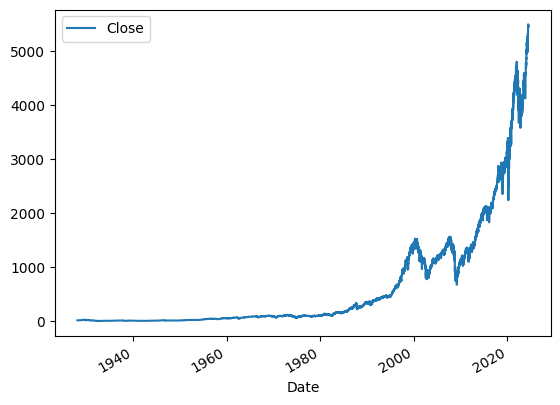

In [6]:
#plotting the data
sp500.plot.line(y = 'Close',use_index = True)
plt.show()

There looks an upward trend in the data

In [7]:
# removing the unwanted columns
sp500 = sp500.drop(['Dividends','Stock Splits'],axis = 1)
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000


# Setting up target for modelling

In [8]:
# creating column for tommorow's price calculation
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805


In [10]:
# checking if the tomorrow price is greater than today's price
sp500['Target'] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805,1


In [11]:
# there is lot of historical data in this dataset but
# but if we go back too far maret would have shifted fundamentally
# hence we are going to remove data brfore 1990   
sp500 = sp500.loc["1990-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805,1


# Model Training

In [13]:
# fiting the model
model = RandomForestClassifier(n_estimators=100, min_samples_split= 100, random_state= 1)

In [14]:
# spliting the data into train and test datasets

train = sp500.iloc[:-100]
test = sp500.iloc[:100].iloc[-100:]
# performing feature selection
predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
# generating prediction
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

In [16]:
precision_score(test["Target"], preds)

np.float64(0.7323943661971831)

<Axes: xlabel='Date'>

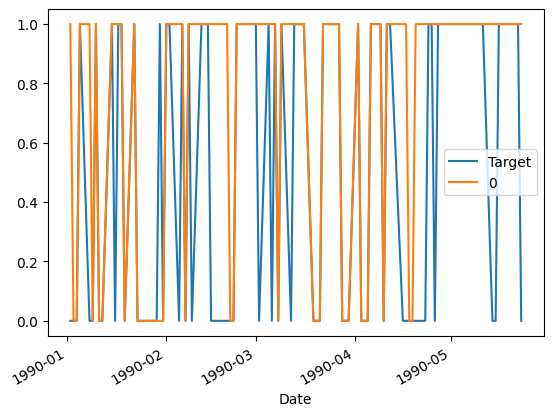

In [17]:
# ploting predictions
combined = pd.concat([test["Target"],preds],axis = 1)
combined.plot()

# Building a Backtesting Model

In [18]:
# creating a prediction function
def predict(train, test, predictors, model): # function will take these variables
    model.fit(train[predictors], train["Target"]) # fitting the model
    preds = model.predict(test[predictors]) # generating the predictions
    preds = pd.Series(preds, index=test.index, name="Predictions") #combining the model into series called "Predictions"
    combined = pd.concat([test["Target"], preds], axis=1) # combining together  
    return combined

In [19]:
# creating a backtest function
def backtest(data, model, predictors, start=2500, step=250): # start value : The initial index in the data to start the backtesting from, step : The step size to increment the testing index.
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() # creating train data
        test = data.iloc[i:(i+step)].copy() # creating test data
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [20]:
# backtest
predictions = backtest(sp500, model, predictors)

In [21]:
# 0 - market will go down 
#1 - market will go up
predictions["Predictions"].value_counts()

Predictions
0    3591
1    2596
Name: count, dtype: int64

In [22]:
# checking precision score
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5288906009244992)

In [23]:
# percentage of days when market went up
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.534831
0    0.465169
Name: count, dtype: float64

In [24]:
# adding new predictors to the model to see if it increases the accuracy
horizons = [2,5,60,250,1000] # no of days where we want to look at rolling means

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] 
    new_predictors += [trend_column, trend_column]

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0,0.998735,1.0,1.002457,3.0,1.047694,34.0,1.149140,140.0,1.296379,531.0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0,0.999218,0.0,0.999760,2.0,1.045187,34.0,1.146270,140.0,1.293630,530.0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805,1,0.998465,0.0,0.996103,2.0,1.041322,33.0,1.141684,140.0,1.288953,529.0


In [26]:
# removing missing rows
sp500 = sp500.dropna()

In [27]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5473.169922,0,1.001259,2.0,1.006919,4.0,1.051203,34.0,1.153106,141.0,1.300407,532.0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0,0.998735,1.0,1.002457,3.0,1.047694,34.0,1.149140,140.0,1.296379,531.0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0,0.999218,0.0,0.999760,2.0,1.045187,34.0,1.146270,140.0,1.293630,530.0


In [28]:
#updating the model parameters 
model = RandomForestClassifier(n_estimators=200, min_samples_split= 50, random_state= 1)

In [29]:
#predicting 
def predict(train, test, predictors, model): # function will take these variables
    model.fit(train[predictors], train["Target"]) # fitting the model
    preds = model.predict_proba(test[predictors])[:,1] # predicting the probabilities of stocks to go up tomorrow
    preds[preds>= .6] = 1 # price go up
    preds[preds <.6] = 0 # price go down
    # generating the predictions
    preds = pd.Series(preds, index=test.index, name="Predictions") #combining the model into series called "Predictions"
    combined = pd.concat([test["Target"], preds], axis=1) # combining together  
    return combined

In [30]:
# running the backtest
predictions = backtest(sp500,model,new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    4184
1.0    1002
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"],predictions["Predictions"])

np.float64(0.5698602794411177)